**Finite-Temperature Extension for Cold Neutron Star Equations of State**

A. Nikolaidis

Aristotle University of Thessaloniki

July 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
from IPython.display import display, Math, Latex
from decimal import Decimal
from scipy.optimize import curve_fit
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os
from io import StringIO

# The Set of Equations for the Pressure of a Finite-Temperature Dense Gas

The pressure of $n-p-e$ matter is given by
\begin{equation}
\begin{aligned}
P\left(n, Y_{p}, T\right)=&(\text { Cold EOS in } \beta \text { -equilibrium })+K\left(Y_{p}^{4 / 3}-Y_{p, \beta}^{4 / 3}\right) n^{4 / 3} \\
+& P_{\text {sym }}(n, T=0)\left[\left(1-2 Y_{p}\right)^{2}-\left(1-2 Y_{p, \beta}\right)^{2}\right] \\
+& \left\{\begin{array}{ll}
4 \sigma f_{s} T^{4} /(3 c), & n<n_{1} \\
n k_{B} T, & n_{1}<n<n_{2} \\
-\left[\frac{\partial a\left(0.5 n, 0.5 M_{\mathrm{SM}}\right)}{\partial n}+\frac{\partial a\left(Y_{p} n, m_{e}\right)}{\partial n} Y_{p}\right] n^{2} T^{2}, & n>n_{2}
\end{array}\right.
\end{aligned}
\end{equation}
where $n_1$ and $n_2$ are the transition densities for the thermal pressure at a particular temperature and proton fraction. 

The symmetry pressure is written as
\begin{equation*}
    P_{\text {sym }}(n, T=0)=\frac{2 \eta}{3} n E_{\text {sym }}^{\mathrm{kin}}(n)+\left[S_{0}-\eta E_{\text {sym }}^{\mathrm{kin}}\left(n_{\text {sat }}\right)\right]\left(\frac{n}{n_{\text {mt }}}\right)^{\gamma} \gamma n.
\end{equation*}
The expression for the proton fraction at $\beta$-equilibrium is given \begin{equation} 
\frac{Y_{p, \beta}}{\left(1-2 Y_{p, \beta}\right)^{3}}=\frac{64}{3 \pi^{2} n}\left[\frac{E_{\mathrm{sym}}(n, T=0)}{\hbar c}\right]^{3}.
\end{equation}.

The derivatives for the effective mass are
\begin{equation*}
    \begin{array}{l}
\left.\frac{\partial a\left(n_{q}, M^{*}\right)}{\partial n}\right|_{Y_{q}}=-\left(\frac{2 a\left(n_{q}, M^{*}\right)}{3 n}\right) \times \\
\left\{1-\frac{1}{2}\left[\frac{M^{*}\left(n_{q}\right)^{2}}{M^{*}\left(n_{q}\right)^{2}+\left(3 \pi^{2} n_{q}\right)^{2 / 3}(h c)^{2}}\right]\left(\frac{\left(3 \pi^{2} n_{q}\right)^{2 / 3}(h c)^{2}}{M^{*}\left(n_{q}\right)^{2}}+\left.3 \frac{\left.\partial \ln \mid M^{*}\left(n_{q}\right)\right]}{\partial \ln n}\right|_{Y_{4}}\right)\right\},
\end{array}
\end{equation*}
and
\begin{equation*}
    \left.\frac{\partial \ln \left[M^{*}\left(n_{q}\right)\right]}{\partial \ln n}\right|_{Y_{q}}=-\alpha\left[1-\left(\frac{M^{*}\left(n_{q}\right)}{Y_{q} m c^{2}}\right)^{2}\right],
\end{equation*}

In [2]:
#variables

n_sat = 0.16 #fm^-3
h_bar = 6.5821e-16 #eV*s
hbar_c = 197.326980 #MeV*fm
c = 2.9979e8 #m/sec
m = 939.565420 #MeV/c^2
K = pow(3*(np.pi**2), 1/3)*(hbar_c/4)
k_b = 8.617333262145e-5 #eV/K
σ = 5.670374419e-8 # J*m-2*s-1*K-4
m_e = 0.510998950 #MeV/c^2

Here we set the values for the symmetry energy at nuclear saturation density ($S_0$) and the slope of the symmetry energy ($L$). Of course, these values change depending on the EOS we use, and can be found in bibliography.

In [3]:
S_0 = 32.56 #MeV
L = 60.43 #MeV

# 1. - Derivation of Cold Symmetry Energy in the Fermi Gas Limit

First, we must load the EOS files we will use and extract the appropriate data from each one. For more information about the format of these files and how to download them, one should head to Appendix B of my Diploma Thesis, or the CompOSE guide.

In [4]:
#load the data sets and create the n_b - E_sym grid

%ls

eos_file_zero_temp = 'HS_FSG (w_electrons) 0,1.table'
data_set_1 = np.genfromtxt(eos_file_zero_temp)

eos_file_beta = 'HS_FSG (w_electrons).beta'
data_set_2 = np.genfromtxt(eos_file_beta)

#data at zero temp and Yp = 0.1
n = []
pressure = []
itter = 0
while itter < len(data_set_1) :
    n.append(data_set_1[itter,1])
    pressure.append(data_set_1[itter,4])
    itter = itter+1
    
#data at beta equilibrium
n_b = []
Y_p_b = []
E_sym_0 = []
P_b = []

itter = 0
while itter < len(data_set_2) :
    n_b.append(data_set_2[itter,0])
    Y_p_b.append(data_set_2[itter,1])
    P_b.append(data_set_2[itter,3])
    E_sym_0.append(pow((3*(np.pi**2)*n_b[itter]*Y_p_b[itter])/64,1/3)*(hbar_c/(1-2*Y_p_b[itter])))
    itter = itter+1
    
#display(n_b)
#display(Y_p_b)
#display(E_sym_0)

 Volume in drive C has no label.
 Volume Serial Number is AC8D-594C

 Directory of C:\Users\admin

26/09/2020  12:41 μμ    <DIR>          .
26/09/2020  12:41 μμ    <DIR>          ..
31/03/2019  01:21 μμ    <DIR>          .anaconda
25/09/2020  02:14 μμ             2.128 .bash_history
26/09/2020  12:42 μμ    <DIR>          .conda
26/09/2020  12:01 μμ                43 .condarc
24/02/2020  12:44 μμ                80 .gitconfig
22/09/2020  06:10 μμ    <DIR>          .ipynb_checkpoints
31/03/2019  01:23 μμ    <DIR>          .ipython
28/10/2019  02:30 μμ    <DIR>          .jupyter
06/10/2019  03:19 μμ    <DIR>          .matplotlib
24/02/2020  12:42 μμ    <DIR>          .ssh
03/11/2019  04:06 μμ           367.500 1. Newt.ipynb
24/11/2019  03:56 μμ           277.197 2. GR.ipynb
10/09/2020  12:35 μμ    <DIR>          3D Objects
28/10/2019  02:50 μμ    <DIR>          Anaconda3
24/02/2020  12:42 μμ    <DIR>          bsc-thesis
10/09/2020  12:35 μμ    <DIR>          Contacts
12/05/2020  07:24 μμ  

In [5]:
#fit for γ

def func(x, γ):
    return ((L-3*S_0*γ)*pow(x, 2/3))/((2-3*γ)*pow(n_sat, 2/3))+(S_0 - ((L-3*S_0*γ))/(2-3*γ))*pow((x/n_sat), γ)

popt, pcov = curve_fit(func, n_b, E_sym_0)

popt

array([1.10319659])

Now we set $\gamma$ at the above value and the calculate the $P_{sym}$ at zero-temperature.

In [6]:
γ = 1.10

#calculate η, Ε_kin_sym_nsat

η = (5*(L-3*S_0*γ)*2*m)/(9*(pow(2, 1/3)-1)*((2/3)-γ)*(h_bar**2)*(pow(3*(np.pi**2)*n_sat, 2/3)))

E_kin_sym_nsat = (3*(pow(2, 1/3)-1)*(h_bar**2)*(pow(3*(np.pi**2)*n_sat, 2/3)))/(10*m)

#calculation of P_sym(n, T=0)
P_sym_0 = []

j=0
while j < len(data_set_2):
    E_kin_sym_n = (3*(pow(2, 1/3)-1)*(h_bar**2)*(pow(3*(np.pi**2)*n_b[j], 2/3)))/(10*m)
    P_sym_0.append((2/3)*η*n_b[j]*E_kin_sym_n + (S_0 - η*E_kin_sym_nsat)*(pow(n_b[j]/n_sat, γ))*γ*n_b[j])
    j=j+1
                         
#display(P_sym_0)

In [7]:
#calculation of P(n, Y_p, T=0) at Y_p = 0.1

Y_p = 0.1

P_n_Y = []

k=0
while k < len(data_set_2):
    P_n_Y.append(P_b[k] + K*(pow(Y_p, 4/3)-pow(Y_p_b[k], 4/3))*pow(n_b[k], 4/3) + P_sym_0[k]*(pow(1-2*Y_p, 2)-pow(1-2*Y_p_b[k], 2)))
    k=k+1

#display(P_n_Y)

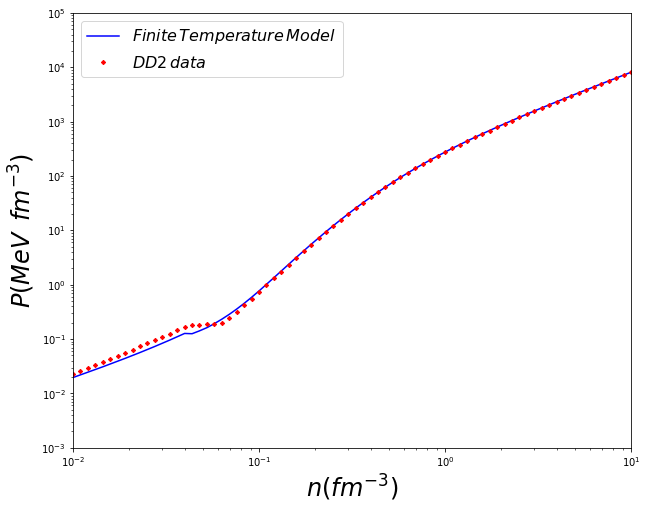

In [8]:
#Plot the Model with the Data

plt.figure(figsize=(10,8))
plt.plot(n_b, P_n_Y, '-', color='blue')
plt.plot(n, pressure, 'D', color='red', markersize=3)
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

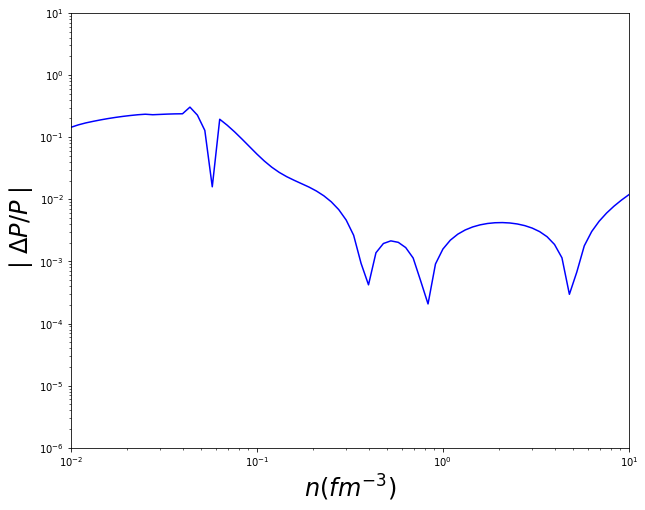

In [9]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_2):
    resid.append((P_n_Y[i]-pressure[i])/pressure[i])
    i=i+1
    
i=0
while i < len(data_set_2):
    if resid[i] < 0: resid[i]=(-1)*resid[i]
    i=i+1
        
#display(P_n_Y)
#display(pressure)
#display(resid)

plt.figure(figsize=(10,8))
plt.plot(n_b, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10)
plt.yscale("log")
plt.xscale("log")

# 2. - Thermal Contribution to the Energy

## $M^{*}$ - approximation

The goal here, is to load the appropriate EOS files and fit for the $M^{*}$ parameters. For each case of $Y_p$ used, we use a simple mean of the values of each parameter for the three temperatures.

### $Y_p = 0.01$ (PNM)

In [10]:
# load EoS data for the M* for 3 Temperatures at Y_p = 0.01

eos_file_001_T_1 = 'HS_FSG (w_electrons) 0,01 1.table'
data_set_001_T_1 = np.genfromtxt(eos_file_001_T_1)

eos_file_001_T_10 = 'HS_FSG (w_electrons) 0,01 10.table'
data_set_001_T_10 = np.genfromtxt(eos_file_001_T_10)

eos_file_001_T_479 = 'HS_FSG (w_electrons) 0,01 479.table'
data_set_001_T_479 = np.genfromtxt(eos_file_001_T_479)

n_001_1 = []
n_001_10 = []
n_001_479 = []

P_data_001_1 = []
P_data_001_10 = []
P_data_001_479 = []

M_star_data_001_1 = []
M_star_data_001_10 = []
M_star_data_001_479 = []

itter=0
while itter < len(data_set_001_T_1):
    n_001_1.append(data_set_001_T_1[itter, 1])
    P_data_001_1.append(data_set_001_T_1[itter, 4])
    M_star_data_001_1.append(data_set_001_T_1[itter, 5]*m)
    itter=itter+1
    
itter=0
while itter < len(data_set_001_T_10):
    n_001_10.append(data_set_001_T_10[itter, 1])
    P_data_001_10.append(data_set_001_T_10[itter, 4])
    M_star_data_001_10.append(data_set_001_T_10[itter, 5]*m)
    itter=itter+1

itter=0
while itter < len(data_set_001_T_479):
    n_001_479.append(data_set_001_T_479[itter, 1])
    P_data_001_479.append(data_set_001_T_479[itter, 4])
    M_star_data_001_479.append(data_set_001_T_479[itter, 5]*m)
    itter=itter+1   

In [11]:
#fit for α, n0

b = 2

def mstar(x, α, n0):
    return pow(pow(m, -b) + pow(m*pow(x/n0, -α), -b), -1/b)

popt, pcov = curve_fit(mstar, n_001_1, M_star_data_001_1)

popt

array([0.61278197, 0.09700674])

In [12]:
#set α and n0 as the mean average from each T

α = 0.61

n0 = 0.10

M_star_001 = []

itter=0
while itter < len(data_set_001_T_1):
    M_star_001.append(pow(pow(m, -b) + pow(m*pow(n_001_1[itter]/n0, -α), -b), -1/b))
    itter=itter+1

#display(M_star_001)

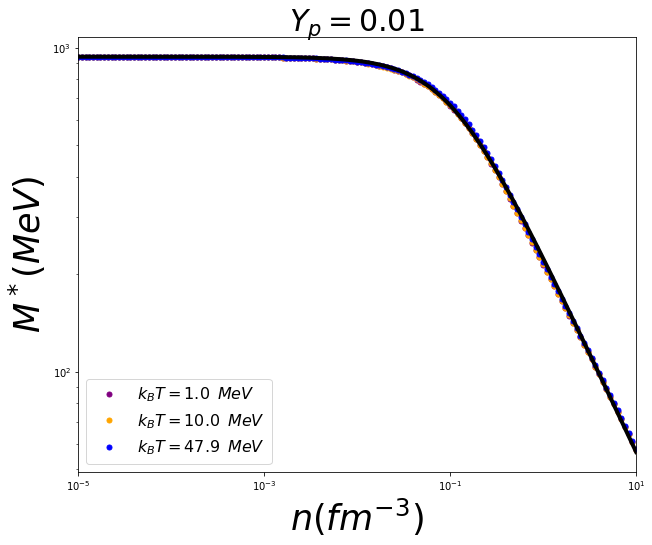

In [13]:
#plot the M* data and the power law at Yp = 0.01 (PNM)

plt.figure(figsize=(10,8))
plt.plot(n_001_1, M_star_data_001_1, 'o', color='purple', markersize=5)
plt.plot(n_001_1, M_star_data_001_10, 'o', color='orange', markersize=5)
plt.plot(n_001_1, M_star_data_001_479, 'o', color='blue', markersize=5)
plt.plot(n_001_1, M_star_001, '-', color='black', linewidth=4)
plt.rc('xtick', labelsize=27)
plt.rc('ytick', labelsize=27)
plt.title(r'$Y_p=0.01$', fontsize=30)
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=35)
plt.ylabel(r'$M^* ( MeV )$', fontsize=35)
legend1 = plt.legend([r'$k_B T = 1.0\enspace MeV$', r'$k_B T = 10.0\enspace MeV$', r'$k_B T = 47.9\enspace MeV$'], loc='best', prop={'size': 16})
plt.xlim(0.00001, 10.0)
plt.yscale("log")
plt.xscale("log")

### $Y_p = 0.5$ (SM)

In [14]:
# load EoS data for the M* for 3 Temperatures at Y_p = 0.5

eos_file_05_T_1 = 'HS_FSG (w_electrons) 0,5 1.table'
data_set_05_T_1 = np.genfromtxt(eos_file_05_T_1)

eos_file_05_T_10 = 'HS_FSG (w_electrons) 0,5 10.table'
data_set_05_T_10 = np.genfromtxt(eos_file_05_T_10)

eos_file_05_T_479 = 'HS_FSG (w_electrons) 0,5 479.table'
data_set_05_T_479 = np.genfromtxt(eos_file_05_T_479)

n_05_1 = []
n_05_10 = []
n_05_479 = []

P_data_05_1 = []
P_data_05_10 = []
P_data_05_479 = []

M_star_data_05_1 = []
M_star_data_05_10 = []
M_star_data_05_479 = []

itter=0
while itter < len(data_set_05_T_1):
    n_05_1.append(data_set_05_T_1[itter, 1])
    P_data_05_1.append(data_set_05_T_1[itter, 4])
    M_star_data_05_1.append(data_set_05_T_1[itter, 5]*m)
    itter=itter+1
    
itter=0
while itter < len(data_set_05_T_10):
    n_05_10.append(data_set_05_T_10[itter, 1])
    P_data_05_10.append(data_set_05_T_10[itter, 4])
    M_star_data_05_10.append(data_set_05_T_10[itter, 5]*m)
    itter=itter+1

itter=0
while itter < len(data_set_05_T_479):
    n_05_479.append(data_set_05_T_479[itter, 1])
    P_data_05_479.append(data_set_05_T_479[itter, 4])
    M_star_data_05_479.append(data_set_05_T_479[itter, 5]*m)
    itter=itter+1   

In [15]:
#fit for α, n0

popt, pcov = curve_fit(mstar, n_05_479, M_star_data_05_479)

popt

array([0.65365931, 0.10190858])

In [16]:
#set α and n0

α = 0.72

n0 = 0.11

M_star_05 = []

itter=0
while itter < len(data_set_05_T_1):
    M_star_05.append(pow(pow(m, -b) + pow(m*pow(n_05_1[itter]/n0, -α), -b), -1/b))
    itter=itter+1

#display(M_star_05)

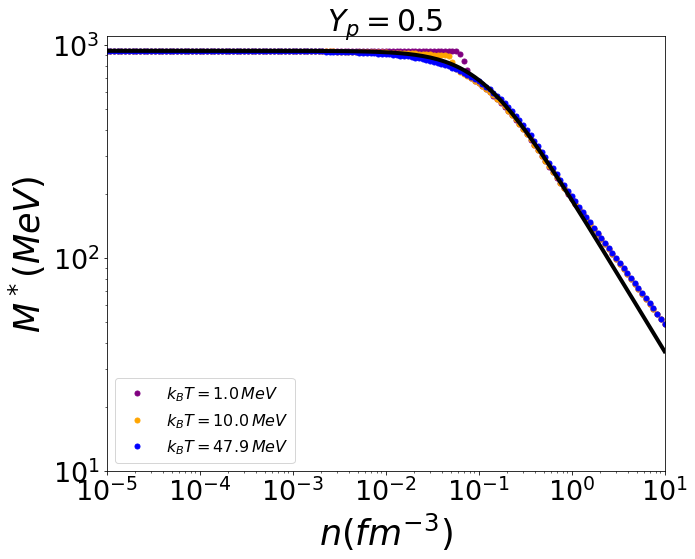

In [17]:
#plot the M* data and the power law at Yp = 0.5 (SM)

plt.figure(figsize=(10,8))
plt.plot(n_05_1, M_star_data_05_1, 'o', color='purple', markersize=5)
plt.plot(n_05_1, M_star_data_05_10, 'o', color='orange', markersize=5)
plt.plot(n_05_1, M_star_data_05_479, 'o', color='blue', markersize=5)
plt.plot(n_05_1, M_star_05, '-', color='black', linewidth=4)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.title(r'$Y_p=0.5$', fontsize=30)
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=35)
plt.ylabel(r'$M^* ( MeV )$', fontsize=35)
legend1 = plt.legend([r'$k_B T = 1.0\,MeV$', r'$k_B T = 10.0\,MeV$', r'$k_B T = 47.9\,MeV$'], loc='best', prop={'size': 16})
plt.xlim(0.00001, 10.0)
plt.ylim(10.0, 1100)
plt.yscale("log")
plt.xscale("log")

## Performance of the $M^{*}$ - approximation of Thermal Effects at fixed $Y_p = 0.1$

In [18]:
#Import data for Yp = 0.1

eos_file_01_T_1 = 'HS_FSG (w_electrons) 0,1 1.table'
data_set_01_T_1 = np.genfromtxt(eos_file_01_T_1)

eos_file_01_T_10 = 'HS_FSG (w_electrons) 0,1 10.table'
data_set_01_T_10 = np.genfromtxt(eos_file_01_T_10)

eos_file_01_T_15 = 'HS_FSG (w_electrons) 0,1 15.table'
data_set_01_T_15 = np.genfromtxt(eos_file_01_T_15)

eos_file_01_T_20 = 'HS_FSG (w_electrons) 0,1 20.table'
data_set_01_T_20 = np.genfromtxt(eos_file_01_T_20)

eos_file_01_T_30 = 'HS_FSG (w_electrons) 0,1 30.table'
data_set_01_T_30 = np.genfromtxt(eos_file_01_T_30)

eos_file_01_T_479 = 'HS_FSG (w_electrons) 0,1 479.table'
data_set_01_T_479 = np.genfromtxt(eos_file_01_T_479)

n_01_1 = []

P_data_01_1 = []
P_data_01_10 = []
P_data_01_15 = []
P_data_01_20 = []
P_data_01_30 = []
P_data_01_479 = []

itter=0
while itter < len(data_set_01_T_1):
    n_01_1.append(data_set_01_T_1[itter, 1])
    P_data_01_1.append(data_set_01_T_1[itter, 4])
    P_data_01_10.append(data_set_01_T_10[itter, 4])
    P_data_01_15.append(data_set_01_T_15[itter, 4])
    P_data_01_20.append(data_set_01_T_20[itter, 4])
    P_data_01_30.append(data_set_01_T_30[itter, 4])
    P_data_01_479.append(data_set_01_T_479[itter, 4])
    itter=itter+1

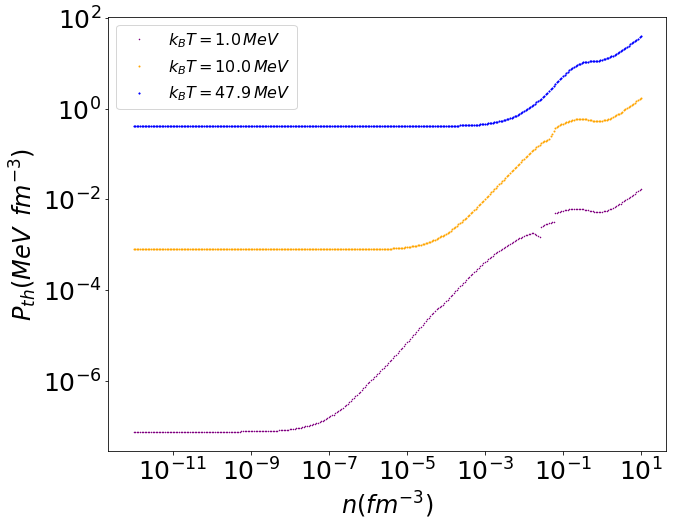

In [19]:
#Calculate the thermal contribution to the data

P_th_data_1 = []
P_th_data_10 = []
P_th_data_15 = []
P_th_data_20 = []
P_th_data_30 = []
P_th_data_479 = []
    
itter=0
while itter < len(data_set_01_T_1):
    P_th_data_1.append(P_data_01_1[itter] - pressure[itter])
    P_th_data_10.append(P_data_01_10[itter] - pressure[itter])
    P_th_data_15.append(P_data_01_15[itter] - pressure[itter])
    P_th_data_20.append(P_data_01_20[itter] - pressure[itter])
    P_th_data_30.append(P_data_01_30[itter] - pressure[itter])
    P_th_data_479.append(P_data_01_479[itter] - pressure[itter])
    itter=itter+1

#display(P_data_cold)
#display(P_th_data_10)

plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_th_data_1, '*', color='purple', markersize=1)
plt.plot(n_01_1, P_th_data_10, 'o', color='orange', markersize=1)
plt.plot(n_01_1, P_th_data_479, 'D', color='blue', markersize=1)
plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P_{th} ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$k_B T = 1.0\,MeV$', r'$k_B T = 10.0\,MeV$', r'$k_B T = 47.9\,MeV$'], loc='best', prop={'size': 16})
plt.yscale("log")
plt.xscale("log")

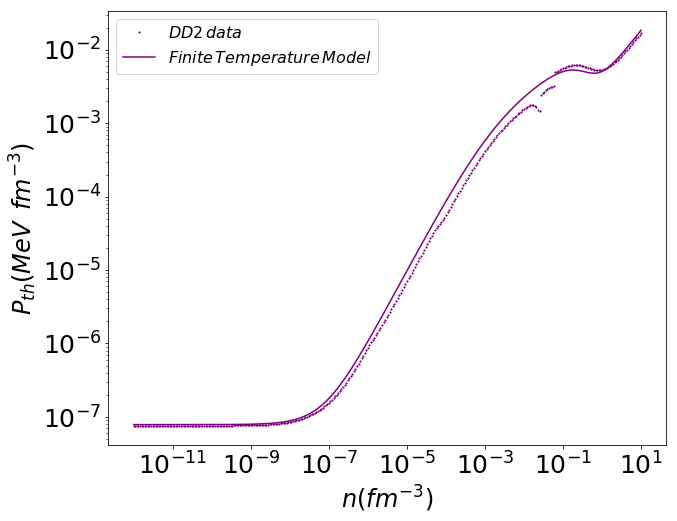

In [20]:
#Calculate the thermal pressure according to the model at each T

P_th_1 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11


T = 1

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_1.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1

#display(Y_e_01_1)   
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_th_data_1, 'D', color='purple', markersize=1)
plt.plot(n_01_1, P_th_1, '-', color='purple')
plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P_{th} ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$DD2\,data$', r'$Finite\,Temperature\,Model$'], loc='best', prop={'size': 16})
plt.yscale("log")
plt.xscale("log")

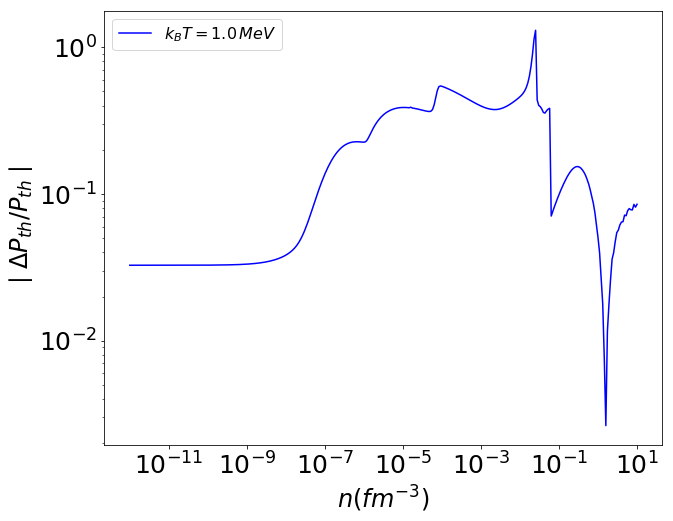

In [21]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_th_1[i]-P_th_data_1[i])/P_th_data_1[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P_{th}/P_{th}\mid $', fontsize=24)
plt.legend([r'$k_B T = 1.0\,MeV$'], loc='best', prop={'size': 16})
plt.yscale("log")
plt.xscale("log")

# Putting It All Together

## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 1\;\mathrm{MeV}$

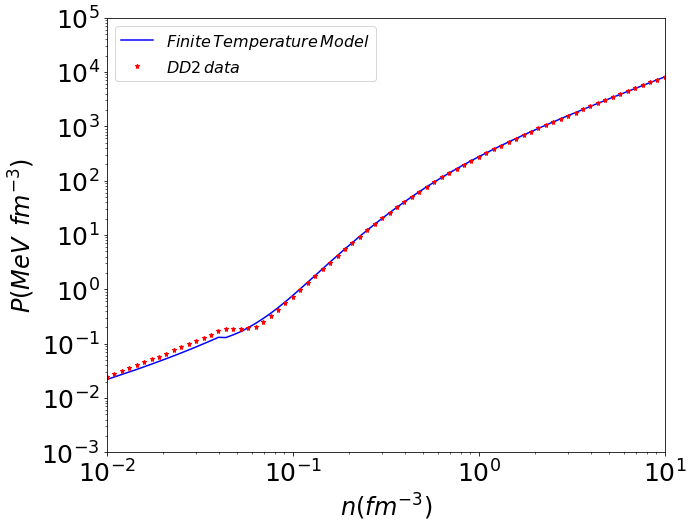

In [22]:
#Full Pressure according to the model

P_model_1 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_1.append(P_n_Y[itter]+P_th_1[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_1, '-', color='blue')
plt.plot(n_01_1, P_data_01_1, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

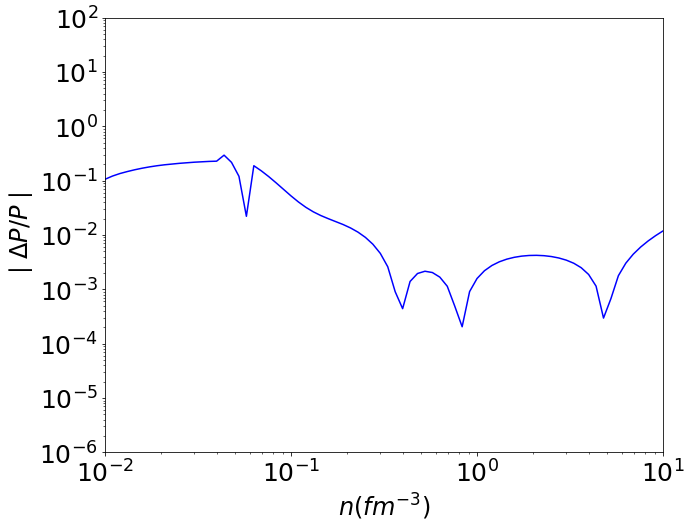

In [23]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_1[i]-P_data_01_1[i])/P_data_01_1[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")


## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 10\;\mathrm{MeV}$

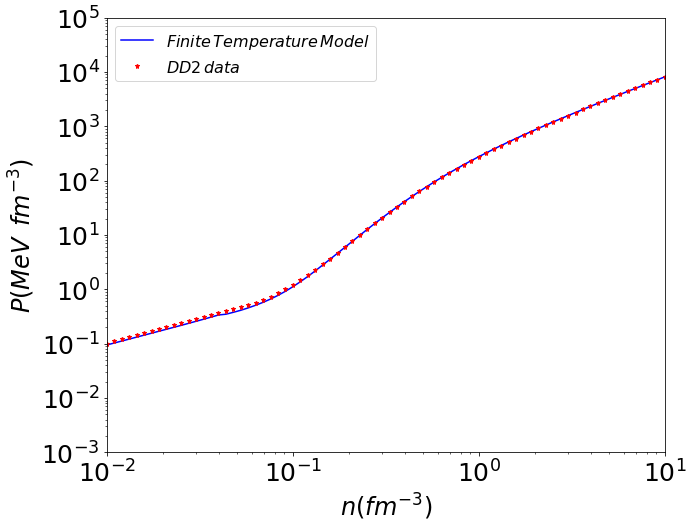

In [24]:
P_th_10 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11

T = 10

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_10.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1
    
P_model_10 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_10.append(P_n_Y[itter]+P_th_10[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_10, '-', color='blue')
plt.plot(n_01_1, P_data_01_10, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

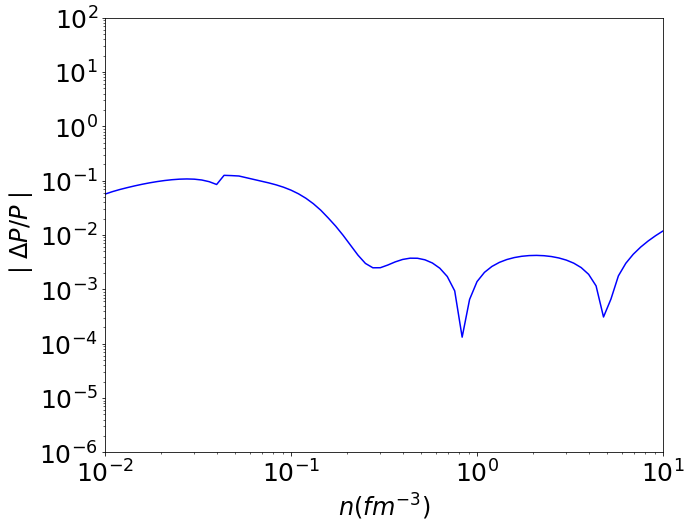

In [25]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_10[i]-P_data_01_10[i])/P_data_01_10[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")

## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 15\;\mathrm{MeV}$

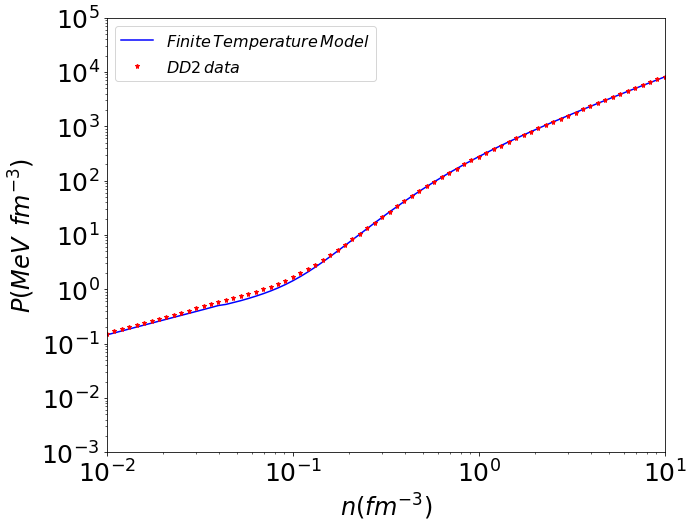

In [26]:
P_th_15 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11

T = 15

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_15.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1
    
P_model_15 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_15.append(P_n_Y[itter]+P_th_15[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_15, '-', color='blue')
plt.plot(n_01_1, P_data_01_15, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

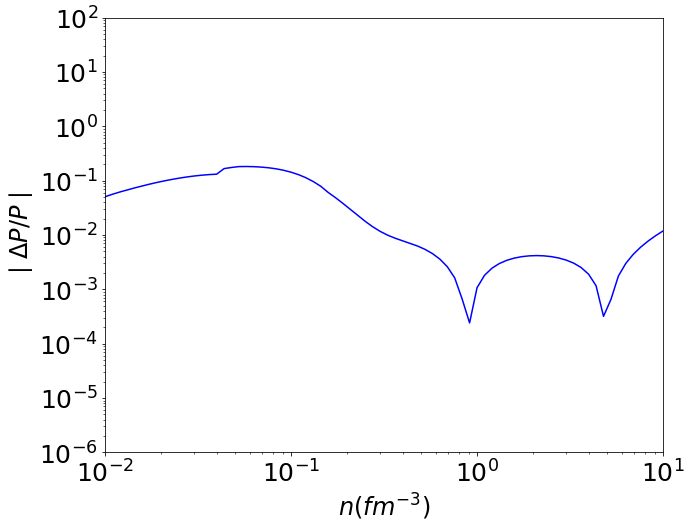

In [27]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_15[i]-P_data_01_15[i])/P_data_01_15[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")

## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 20\;\mathrm{MeV}$

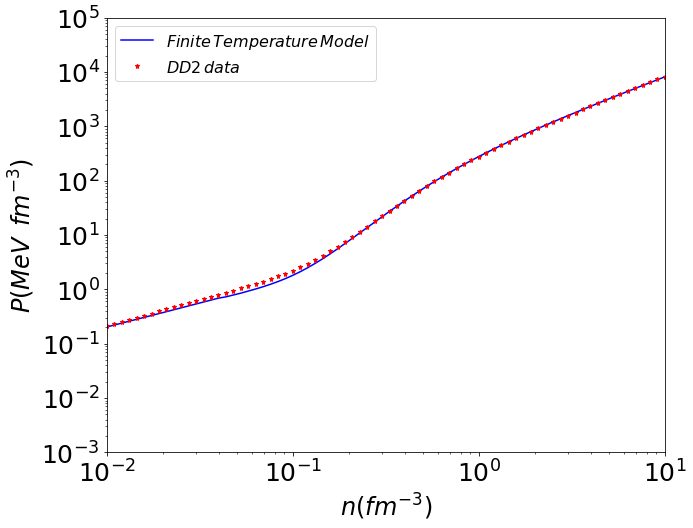

In [28]:
P_th_20 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11

T = 20

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_20.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1
    
P_model_20 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_20.append(P_n_Y[itter]+P_th_20[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_20, '-', color='blue')
plt.plot(n_01_1, P_data_01_20, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

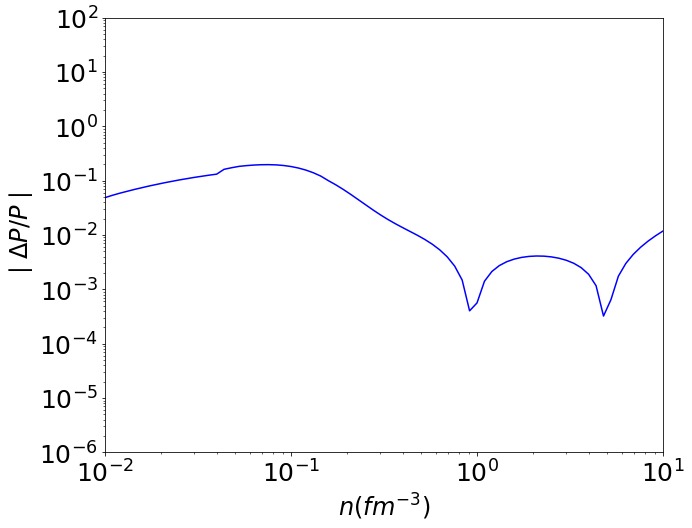

In [29]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_20[i]-P_data_01_20[i])/P_data_01_20[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")

## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 30\;\mathrm{MeV}$

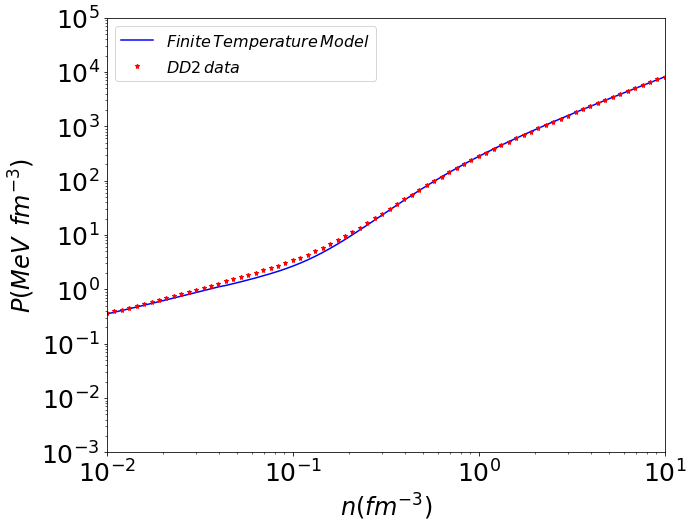

In [30]:
P_th_30 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11

T = 30

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_30.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1
    
P_model_30 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_30.append(P_n_Y[itter]+P_th_30[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_30, '-', color='blue')
plt.plot(n_01_1, P_data_01_30, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

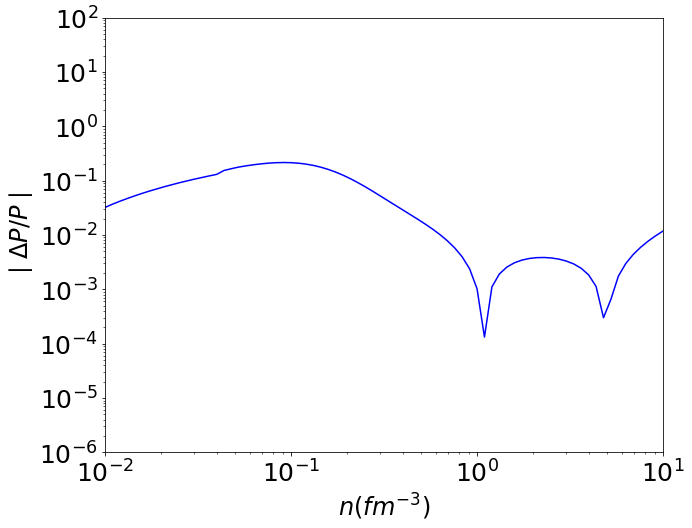

In [31]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_30[i]-P_data_01_30[i])/P_data_01_30[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")

## Comparing the EOS Data with the Raithel Model at $Y_p = 0.1$ and $T = 47.9\;\mathrm{MeV}$

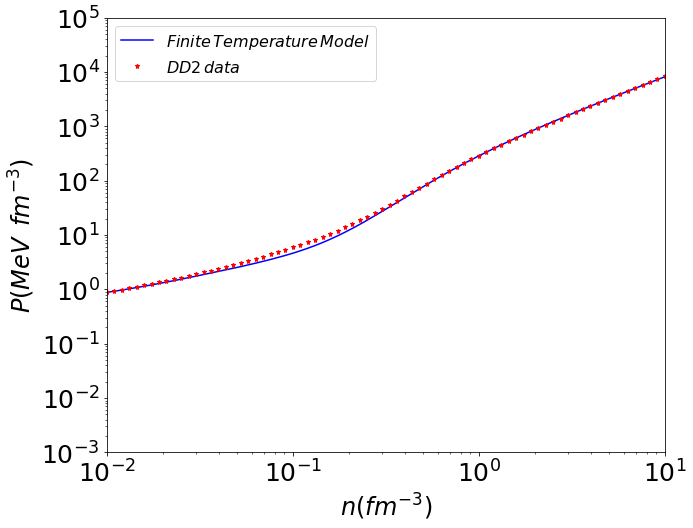

In [32]:
P_th_479 = []
P_id = []
a_p = []
a_e = []
t = []
u = []
v = []
i = []
j = []
k = []
dev_p = []
dev_e = []
P_deg = []

α = 0.72

n0 = 0.11

T = 47.9

f = 11/4


itter=0
while itter < len(data_set_01_T_1):
    P_rel = (11.3e7*4*σ*(f)*pow(T, 4))/(3*c)
    P_id.append(11604.525*n_01_1[itter]*k_b*T)
    a_p.append(pow(np.pi*k_b,2)*0.5*pow(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)+pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    t.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2) + pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)))
    u.append(pow(1.5*pow(np.pi,2)*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)))
    v.append(pow(0.5*mstar(0.5*n_01_1[itter],α,n0),2)/(pow(Y_p*m*pow(c,2),2)))
    dev_p.append(-((2*a_p[itter])/(3*n_01_1[itter]))*(1-0.5*t[itter]*(u[itter]-3*α+3*α*v[itter])))
    a_e.append(pow(np.pi*k_b,2)*0.5*pow(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2),1/2)/(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    i.append(pow(m_e,2)/(pow(m_e,2)+pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)))
    j.append(pow(3*pow(np.pi,2)*Y_p*n_01_1[itter],2/3)*pow(hbar_c,2)/(pow(m_e,2)))
    k.append(pow(m_e,2)/(pow(Y_p*m*pow(c,2),2)))
    dev_e.append(-((2*a_e[itter])/(3*n_01_1[itter]))*(1-0.5*i[itter]*(j[itter]-3*α+3*α*k[itter])))
    P_deg.append(-0.0134527e10*(dev_p[itter] + dev_e[itter]*Y_p)*pow(n_01_1[itter],2)*pow(T,2))
    P_th_479.append(P_rel + pow(pow(P_id[itter],-1) + pow(P_deg[itter],-1),-1))
    itter=itter+1
    
P_model_479 = []

itter=0
while itter < len(data_set_01_T_1):
    P_model_479.append(P_n_Y[itter]+P_th_479[itter])
    itter=itter+1
    
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_model_479, '-', color='blue')
plt.plot(n_01_1, P_data_01_479, '*', color='red', markersize=5)

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$Finite\,Temperature\,Model$', r'$DD2\,data$'], loc='best', prop={'size': 16})
plt.xlim(0.01, 10.0) 
plt.ylim(0.001, 10.0**5)
plt.yscale("log")
plt.xscale("log")

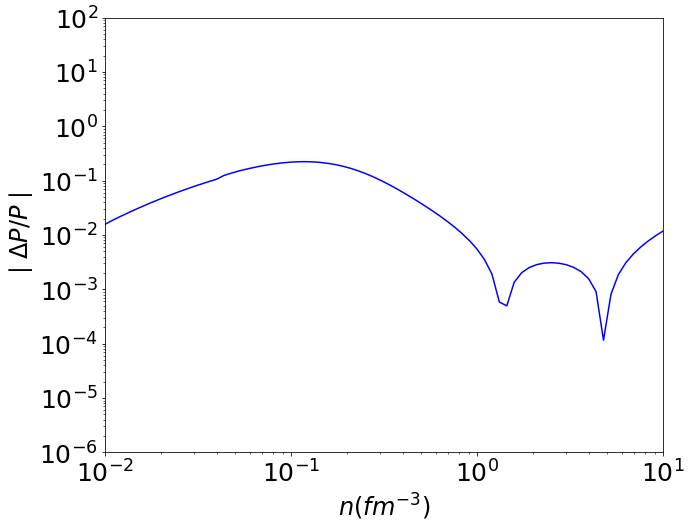

In [33]:
#Calculate and plot the residuals

resid = []

i=0
while i < len(data_set_01_T_1):
    resid.append((P_model_479[i]-P_data_01_479[i])/P_data_01_479[i])
    i=i+1
    
for i in range(0,len(data_set_01_T_1)):
    if resid[i] < 0: resid[i]=(-1)*resid[i]

plt.figure(figsize=(10,8))
plt.plot(n_01_1, resid, '-', color='blue')
plt.show

plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$\mid\Delta P/P\mid $', fontsize=24)
plt.xlim(0.01, 10.0) 
plt.ylim(0.000001, 10.0**2)
plt.yscale("log")
plt.xscale("log")

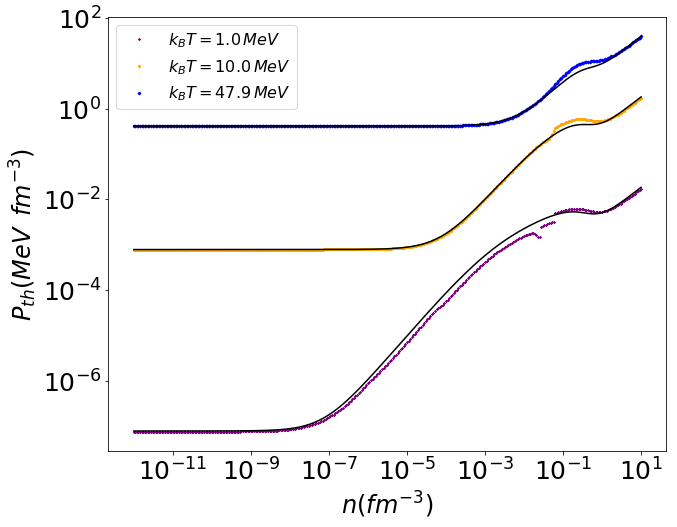

In [34]:
plt.figure(figsize=(10,8))
plt.plot(n_01_1, P_th_data_1, '*', color='purple', markersize=2)
plt.plot(n_01_1, P_th_data_10, 'o', color='orange', markersize=2)
plt.plot(n_01_1, P_th_data_479, 'D', color='blue', markersize=2)
plt.plot(n_01_1, P_th_1, '-', color='black')
plt.plot(n_01_1, P_th_10, '-', color='black')
plt.plot(n_01_1, P_th_479, '-', color='black')
plt.xlabel(r'$n ( fm^{-3} )$', fontsize=24)
plt.ylabel(r'$P_{th} ( MeV \enspace fm^{-3} )$', fontsize=24)
plt.legend([r'$k_B T = 1.0\,MeV$', r'$k_B T = 10.0\,MeV$', r'$k_B T = 47.9\,MeV$'], loc='best', prop={'size': 16})
plt.yscale("log")
plt.xscale("log")

We finish off by loading the data we calculated in an array and then saving said array in a .txt file.

In [35]:
results = np.zeros((326,15))

i=0
while i < len(data_set_01_T_1):
    results[i][0] = n_01_1[i]
    results[i][1] = pressure[i]
    results[i][2] = P_data_01_1[i]
    results[i][3] = P_data_01_10[i]
    results[i][4] = P_data_01_15[i]
    results[i][5] = P_data_01_20[i]
    results[i][6] = P_data_01_30[i]
    results[i][7] = P_data_01_479[i]
    results[i][8] = P_n_Y[i]
    results[i][9] = P_th_1[i]
    results[i][10] = P_th_10[i]
    results[i][11] = P_th_15[i]
    results[i][12] = P_th_20[i]
    results[i][13] = P_th_30[i]
    results[i][14] = P_th_479[i]
    i=i+1

In [36]:
#Export the results to the appropriate .txt file

np.savetxt("FSG Y_p = 0.1 Results.txt", results, fmt="%s")